<a href="https://colab.research.google.com/github/caffonso/Control/blob/main/Control10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Second order system


## 1  Eletrical system

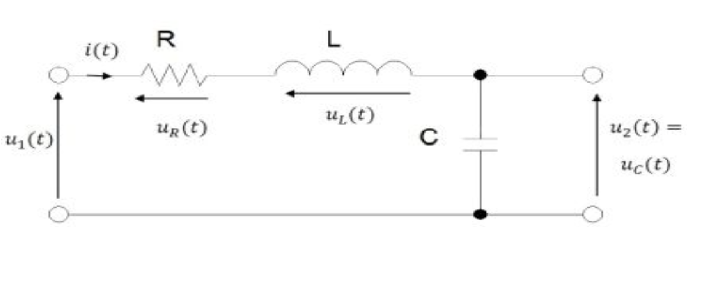

$v_{1}: input$

$v_{2}: output$

*Kirchhof law*

$ v_{1} = r.i(t) + l\frac{d}{dt}i(t) + \frac{1}{c}\int \! i(t) \, \mathrm{d}t$

$ v_{2} =  \frac{1}{c}\int \! i(t) \, \mathrm{d}t$

but

$V(s) = \mathcal{L}(v(t))$ ; $  I(s) = \mathcal{L}(i(t)) $

$\mathcal{L}(\int \! i(t) \, \mathrm{d}t) = \frac{1}{s}I$

$ L(l\frac{d}{dt}i(t)) = lsI$

then

$ V_{1} =  rI + \frac{1}{sc}I = I(r + ls + \frac{1}{sc} )$

$ V_{2} =  \frac{1}{sc}I$

Transfer function

$ G(s) = \frac{V_{2}}{V_{1}} = \frac {1/lc}{s^{2} + \frac{r}{l}s + \frac{1}{lc}}$

Output

$ V_{2}(s) = G(s).V_{1}(s) $

back to time:

$v_{2}(t) =  \mathcal{L}^{-1}(G(s).V_{1}(s))$

In [ ]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
sympy.init_printing()
%matplotlib inline

In [ ]:
r, l, c = sympy.symbols('r,l,c',real=True, positive=True)
t, s = sympy.symbols('t, s')

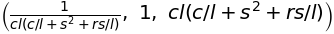

In [ ]:
# transfer function
G  = (1/(l*c))/(s**2 + r/l*s + 1/l*c)
A  = sympy.numer(G) 
B  = sympy.denom(G)
G,A,B

In [ ]:
L    = lambda f: sympy.laplace_transform(f, t, s, noconds=True) 
invL = lambda F: sympy.inverse_laplace_transform(F, s, t)

In [ ]:
def showRoots(z,p):
  plt.title("Complex Roots")
  for i in range(len(z)):
    plt.scatter(sympy.re(z[i]),sympy.im(z[i]), marker='o',color = "blue")
  for i in range(len(p)): 
    plt.scatter(sympy.re(p[i]),sympy.im(p[i]), marker='X', color = "red")
  plt.ylabel("j") 
  plt.xlabel('R')  
  plt.axhline(0, color='black')
  plt.axvline(0, color='black')
  plt.show()

Exemplo numérico:

Considere um quadriplo com as seguintes características:\
$ r = 8 \Omega $; $ c = 6 C $, $ l = 50 H $\
**1.** Escreva a sáida $u_{2}(t)$ para um entrada impulso unitário ($U_{1}(s) =1$).


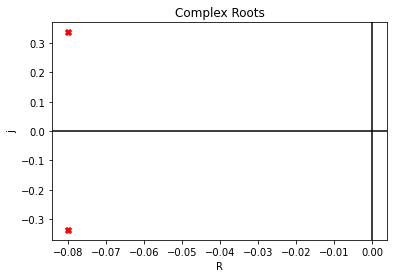

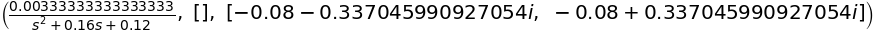

In [ ]:
l,r,c = 50, 8, 6
G  = (1/(l*c))/(s**2 + r/l*s + 1/l*c)
A  = sympy.numer(G) 
B  = sympy.denom(G)
z = sympy.solve(A,s)
p = sympy.solve(B,s)
showRoots(z,p)
G,z,p

In [ ]:
# Tensão de saida u2
U1  = 1
u2 = invL(G*U1)
u2

Uma desvantagem em relação a biblioteca simbólica **sympy** é que os gráfico estão definidos apenas até $t=10s$.\
É possivel utilizar a biblioteca **numpy** em associação a sympy, para melhar a representação das funções como segue:


In [ ]:
def showGraf(ti,tf,name,y):
  plt.title(name) 
  plt.axhline(y=0, color='black', linewidth=.5)
  plt.axvline(x=0, color='black', linewidth=.5) 
  plt.xlabel("t"),plt.ylabel("y(t)")
  plt.legend(['y'])
  plt.plot(t0,y)
  plt.show()

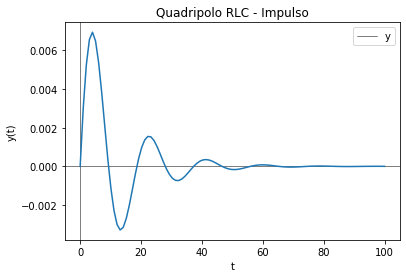

In [ ]:
# Utilizando aa biblioteca numpy
t0 = np.linspace(0,100,100) #ti,tf, numero de  divisões
a0 =  .0098
a1 = -.08
a2 = .337
y = a0*np.exp(a1*t0)*np.sin(a2*t0)
showGraf(0,100,"Quadripolo RLC - Impulso",y)

**2.** Escreva a sáida $u_{2}(t)$ para um entrada degrau unitário ($u_{1}(t) =1$).

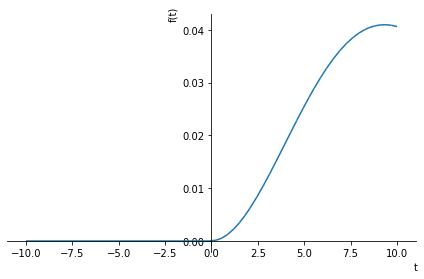

In [ ]:
u1 = 1 # funcao de t
U1 = L(u1)
u2 = invL(G*U1)
sympy.plot(u2)

In [ ]:
u2

Para um saida **degrau unitário**, temos

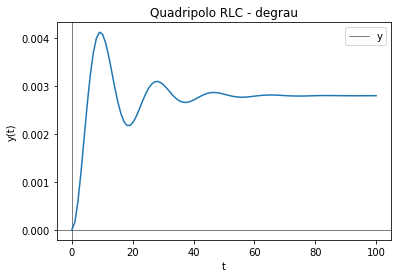

In [ ]:
# Utilizando aa biblioteca numpy
t0 = np.linspace(0,100,100) #ti,tf, numero de  divisões
a0 =  -1
a1 = .08
a2 = .337
a3 = .237
a4 = 1
a5 = -.0028
y = ( a0*np.exp(a1*t0) + a3*np.sin(a2*t0) + a4*np.cos(a2*t0)  )*a5*np.exp(-a1*t0)
showGraf(0,100,"Quadripolo RLC - degrau",y)

# Forma geral: Sistema de 2. ordem
$$ G(s) = \frac{k}{s^{2}+2\alpha s + \omega^{2}} $$

onde:

$\alpha$ : grau de amortecimento

$\omega$: frequencia natural

$k$: ganho




In [ ]:
alpha,zeta,w,k = sympy.symbols('alpha,zeta,w,k',real=True, positive=True)

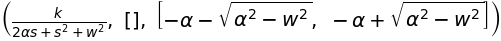

In [ ]:
G = k/(s**2+2*alpha*s+w**2)
A  = sympy.numer(G) 
B  = sympy.denom(G)
z = sympy.solve(A,s)
p = sympy.solve(B,s)
G,z,p

Frequencia de ressonância:\
$\omega_{d} = \sqrt{\alpha^2-\omega^{2}}$\
Coeficiente de amortecimento:\
$\zeta = \frac{\alpha}{\omega} \Leftrightarrow \alpha = \zeta\omega$\
Determina o tipo de amortecimento: (zeta)\
$\zeta> 1$: $\implies \alpha>\omega$: *superamortecido*\
$\zeta = 1$:$\implies \alpha=\omega$: *criticamente amortecido*\
$\zeta < 1$:$\implies \alpha<\omega$: *subamortecido*


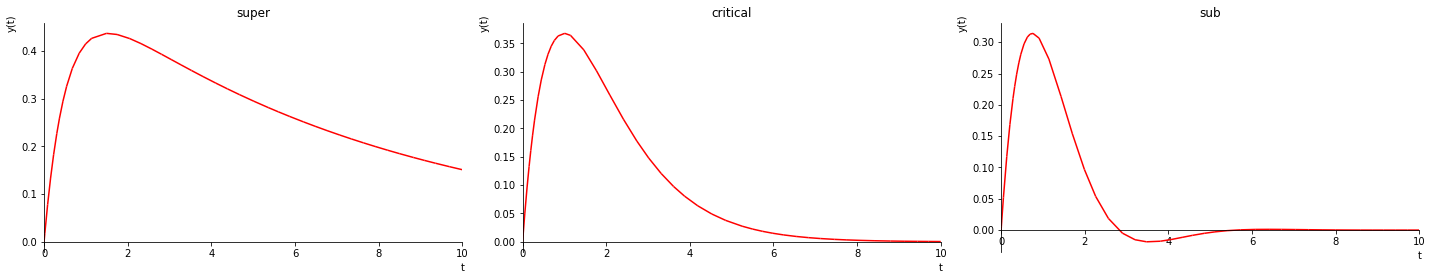

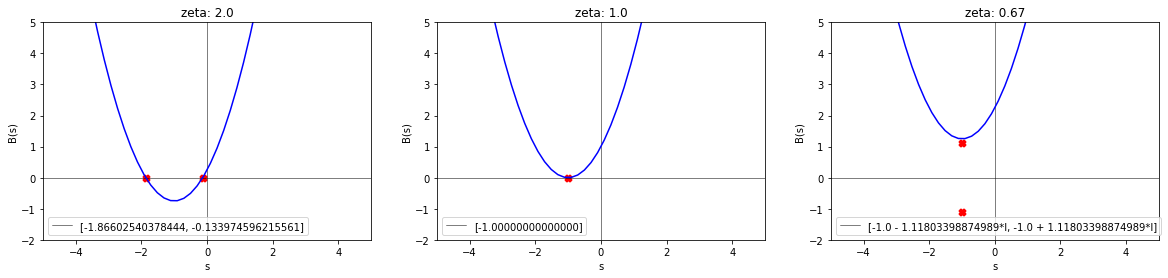

In [ ]:
# define functions
FT = lambda alpha,w: 1/(s**2+2*alpha*s+w**2)

# create separate plots
p1 = sympy.plot(invL(FT(1,.5)), show=False, xlim=(0, 10), line_color='red', title = "super", xlabel = "t", ylabel = "y(t)")
p2 = sympy.plot(invL(FT(1, 1)), show=False, xlim=(0, 10), line_color='red', title = "critical" , xlabel = "t", ylabel = "y(t)")
p3 = sympy.plot(invL(FT(1, 1.5)), show=False, xlim=(0,10), line_color='red', title = "sub", xlabel = "t", ylabel = "y(t)")

# create a plotgrid with 3 rows and 1 column
plotgrid = sympy.plotting.PlotGrid(1, 3, p1, p2, p3,  show=False, size=(20, 4), legende = True)
plotgrid.show()

import numpy as np
s0 = np.linspace(-10, 10, 100)
B = lambda alpha,w: s0**2+ 2*alpha*s0 + w**2

plt.figure(figsize=(20,4)) 
for i in range(1,4):
  alpha = 1; w = .5*i
  z = []
  p = sympy.solve(s**2+2*alpha*s+w**2,s)  
  plt.subplot(1,3,i) 
  plt.title('zeta: '+str(round(1/(.5*i),2))) 
  
  plt.ylim([-2,5]), plt.xlim([-5,5])
  plt.axhline(y=0, color='black', linewidth=.5)
  plt.axvline(x=0, color='black', linewidth=.5) 
  plt.xlabel("s"),plt.ylabel("B(s)")
  plt.plot(s0,B(alpha,w), color='blue')
  plt.legend([str(p)])

  for i in range(len(z)):
    plt.scatter(sympy.re(z[i]),sympy.im(z[i]), marker='o',color = "blue")
  for i in range(len(p)): 
    plt.scatter(sympy.re(p[i]),sympy.im(p[i]), marker='X', color = "red" , linewidths = 2)
plt.show()

Comparando:\
*Mecânico*\
$$ G(s) = \frac{1}{s^{2}+\frac{b}{m}s+\frac{\overline{k}}{m}}$$\
*Electrical*\
$$ G(s) = \frac{1/lc}{s^{2}+\frac{r}{l}s+\frac{1}{lc}}$$




*Tabela*
\begin{matrix}{}
General &   Mechanical & Electrical\\
\frac{K}{s^{2}+2\alpha s + \omega^{2}}   & \frac{1}{s^{2}+\frac{b}{m}s+\frac{\overline{k}}{m}} & \frac{1/lc}{s^{2}+\frac{r}{l}s+\frac{1}{lc}}\\
\alpha & \frac{b}{2m} & \frac{r}{2l} \\
\omega & \sqrt{\frac{\over{k}}{m}} & \sqrt{\frac{1}{lc}}\\
K      & 1 & \frac{1}{lc}
\end{matrix}

*obs.:* $K \neq \overline{k}$

## Atividades

Considere quadripolo  a seguir, onde 

$ r = 8 \Omega $

$ c = 6 C  $

$ l = 20 H $

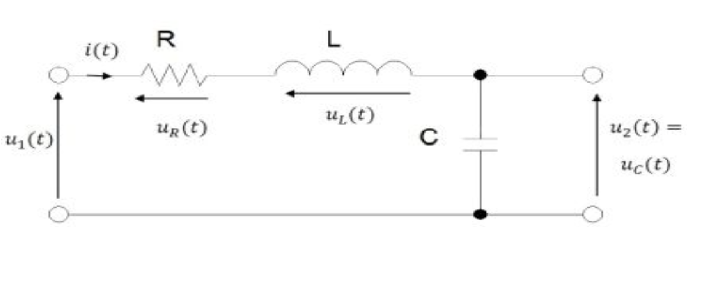

**1.** Mostre os zeros e polos da função de transferencia no plano complexo.

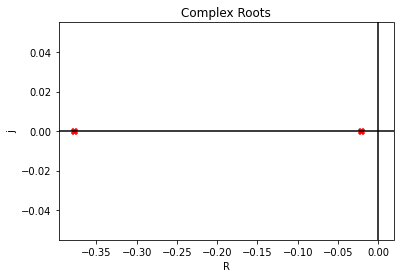

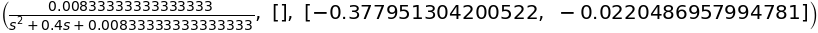

In [ ]:
# coloque seu código aqui
l,r,c = 20, 8, 6
G  = (1/(l*c))/(s**2 + (r/l)*s + 1/(l*c))
A  = sympy.numer(G) 
B  = sympy.denom(G)
z = sympy.solve(A,s)
p = sympy.solve(B,s)
showRoots(z,p)
G,z,p


*saída esperada*

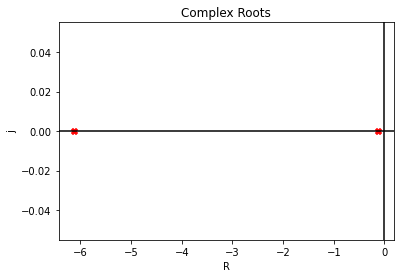

**2.** Determine para esse sistema

a.   Grau de amortecimento - $\zeta$

b.   Coeficiente de amortcimento - $\alpha$

b.   Frequencia de resonância - $\omega$

c.   Ganho - $k$


***Resp***.:

In [ ]:
k = 0.0083
α = 0.2
ω = (0.0083)**.5
ζ = α/ω
ζ



**3.** Como esse sistema é classificado: Superamortecido, criticamente amortecido ou subamortecido ? Por que ?

Resp.: Super amortecido

**4**. Suponha uma tensão constante $u_{1}(t)=110v$, construa o gráfico de $u_{2}(t)$.

a. Determine $u_{2}(t)$


In [ ]:
## coloque seu código aqui


*saída esperada*

$-3.06e^{-.2t}[-1e^{.2t} + 0.39sin(.51t)+cos(.51t)]$

b. Calcule $u_{2}(t= 2.5)$


In [ ]:
# coloque aqui seu codigo
t0 = 2.5
y = 110 + 6.81*np.exp(-0.38*t0) -116.81*np.exp(-0.022*t0)
y

Resp.: $-4.3V$

c. Mostre o gráfico de $u_{2}(t)$, para o intervalo de tempo de $t=[0,100]$.\
 O valor de u2(2.5) obtido do gráfico corresponde á resposta do item b. ?

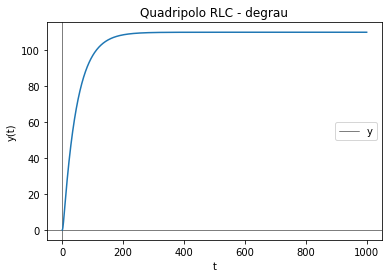

In [ ]:
# coloque seu codigo aqui.
t0 = np.linspace(0,1000,1000) #ti,tf, numero de  divisões
y = 110 + 6.81*np.exp(-0.38*t0) -116.81*np.exp(-0.022*t0)
showGraf(0,100,"Quadripolo RLC - degrau",y)


*saida esperada*
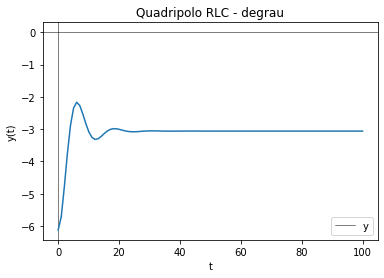